# &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;HACETTEPE UNIVERSITY COMPUTER ENGINEERING
## &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;  &emsp;&emsp;BBM 409 Machine Learning Lab
## &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;  &emsp;&emsp;&emsp;&emsp;  &emsp;&emsp;Assignmet II

### &emsp;Name/Surname: Oktay UĞURLU
### &emsp;School Number: 21627725
### &emsp;E-mail: b21627725@cs.hacettepe.edu.tr

# Part I:  Sentiment Analysis with Naive Bayes

In this assignment, the aim is implementing the Naive Bayes Classifier and using it sentiment analysis of the review data. After the implementing part, we try to analyze the results and usage of laplace smoothing, TF-IDF Vectorizing and stop word elimination while train the model and make prediction. 

In [ ]:
import pandas as pd
from math import log
import numpy as np
import matplotlib.pyplot as plt
import operator
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt                              #For visualization
import seaborn as sns; sns.set()

from itertools import chain

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

 

# Understanding the Data

I have read and transformed the comment and its class to a dataframe. The **class** column corresponds to positive and negative of the comment, the **tokens** column corresponds to comment. I didn't use the other columns but you can see in the dataframe. As you can see below, I have normalized the class names as integer value also: 

In [2]:
##### Data reading and dataframe convertion #######
data = pd.read_csv("all_sentiment_shuffled.txt", delimiter="\n", header=None)
data["id"] = data.iloc[:,0].str.split(" ").map(lambda x: x[2])
data["category"] = data.iloc[:,0].str.split(" ").map(lambda x: x[0])
data["tokens"] = data.iloc[:,0].str.split(" ").map(lambda x: " ".join(x[3:]))
data["CLASS"] = data.iloc[:,0].str.split(" ").map(lambda x: x[1])
del data[0]

##### Normalization of CLASS column #######
class_id_dict = {}
id = 0
for class_name in data["CLASS"].unique():
    class_id_dict[class_name] = id
    id +=1

data["CLASS"] = data["CLASS"].map(lambda x: class_id_dict[x]) # The negative is 0 and the positive is 1

In [3]:
data.head()

,id,category,tokens,CLASS
0,241.txt,music,i bought this album because i loved the title ...,0
1,544.txt,music,i was misled and thought i was buying the enti...,0
2,729.txt,books,"i have introduced many of my ell , high school...",0
3,278.txt,books,anything you purchase in the left behind serie...,1
4,840.txt,dvd,"i loved these movies , and i cant wiat for the...",1


When I calculated most frequently appearing words without **stop words**, we can observed that the **"great"** is most occurred in positive reviews, and the **"just"** is most occurred in negative reviews. These words can helps us in predictions:

In [4]:
###### APPLYIG COUNT VECTORIZING TO THE DATA ######
vectorizer = CountVectorizer(ngram_range=(1, 1), stop_words=ENGLISH_STOP_WORDS)
vector = vectorizer.fit_transform(data["tokens"])
vector_df = pd.DataFrame(vector.toarray())
words_list = list(vectorizer.vocabulary_.keys())
words_list.sort()
vector_df["CLASS"] = data["CLASS"]
words_list.append("CLASS")
vector_df.columns = words_list

In [5]:
##### GET NUMBER OF WORDS FOR POSITIVE AND NEGATIVE ######

statistic_df = pd.DataFrame(index=["sum class negative", "sum class positive"], columns=vector_df.columns.values)
statistic_df.loc["sum class negative"] = vector_df[vector_df["CLASS"]==0].sum(axis=0)
statistic_df.loc["sum class positive"] = vector_df[vector_df["CLASS"]==1].sum(axis=0)
del statistic_df["CLASS"]

Maximum 1st occured word in negative with stop words and its frequency: like - 0.007908
Maximum 1st occured word in negative with stop words its frequency: just - 0.007376
Maximum 1st occured word in negative with stop words its frequency: book - 0.006796


(-1.1159867662416878,
 1.1007612745829376,
 -1.1135801797643903,
 1.116566802355254)

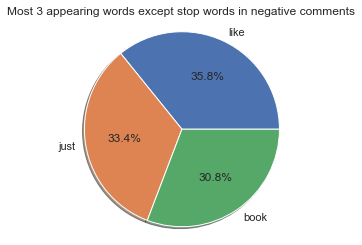

In [6]:
##### PRINT MOST 3 APPEARING WORDS IN NEGATIVE ######

statistic_df = statistic_df.iloc[:, np.argsort(statistic_df.loc["sum class negative"])]
sum_of_negative_words = statistic_df.loc["sum class negative"].sum(axis=0)

print('Maximum 1st occured word in negative with stop words and its frequency: %s - %f' % (statistic_df.iloc[:,-1].name, statistic_df.iloc[:,-1]["sum class negative"]/sum_of_negative_words ))
print('Maximum 1st occured word in negative with stop words its frequency: %s - %f' % (statistic_df.iloc[:,-2].name, statistic_df.iloc[:,-2]["sum class negative"]/sum_of_negative_words ))
print('Maximum 1st occured word in negative with stop words its frequency: %s - %f' % (statistic_df.iloc[:,-3].name, statistic_df.iloc[:,-3]["sum class negative"]/sum_of_negative_words ))

plt.figure(0)
plt.title('Most 3 appearing words except stop words in negative comments')
plt.pie([statistic_df.iloc[:,-1]["sum class negative"], statistic_df.iloc[:,-2]["sum class negative"], statistic_df.iloc[:,-3]["sum class negative"]],
        labels=[statistic_df.iloc[:,-1].name, statistic_df.iloc[:,-2].name, statistic_df.iloc[:,-3].name], autopct='%1.1f%%', shadow=True)
plt.axis('equal')

Maximum 1st occured word in positive with stop words and its frequency: great - 0.007015
Maximum 1st occured word in positive with stop words its frequency: like - 0.006543
Maximum 1st occured word in positive with stop words its frequency: book - 0.005906


(-1.116318270713804, 1.1007770605101812, -1.113934158817448, 1.117467618007037)

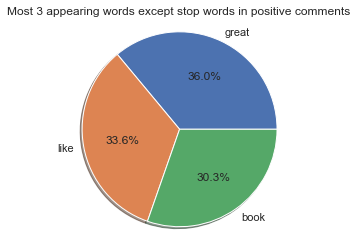

In [7]:
##### PRINT MOST 3 APPEARING WORDS IN POSITIVE ######

statistic_df = statistic_df.iloc[:, np.argsort(statistic_df.loc["sum class positive"])]
sum_of_positive_words = statistic_df.loc["sum class positive"].sum(axis=0)

print('Maximum 1st occured word in positive with stop words and its frequency: %s - %f' % (statistic_df.iloc[:,-1].name, statistic_df.iloc[:,-1]["sum class positive"]/sum_of_positive_words ))
print('Maximum 1st occured word in positive with stop words its frequency: %s - %f' % (statistic_df.iloc[:,-2].name, statistic_df.iloc[:,-2]["sum class positive"]/sum_of_positive_words ))
print('Maximum 1st occured word in positive with stop words its frequency: %s - %f' % (statistic_df.iloc[:,-3].name, statistic_df.iloc[:,-3]["sum class positive"]/sum_of_positive_words ))

plt.figure(0)
plt.title('Most 3 appearing words except stop words in positive comments')
plt.pie([statistic_df.iloc[:,-1]["sum class positive"], statistic_df.iloc[:,-2]["sum class positive"], statistic_df.iloc[:,-3]["sum class positive"]],
        labels=[statistic_df.iloc[:,-1].name, statistic_df.iloc[:,-2].name, statistic_df.iloc[:,-3].name], autopct='%1.1f%%', shadow=True)
plt.axis('equal')

If we analyze this with stop words, **the**, **to**, **and** words are most used in both positive and negative reviews:

Maximum 1st occured word in negative with stop words and its frequency: the - 0.054365
Maximum 1st occured word in negative with stop words its frequency: to - 0.028095
Maximum 1st occured word in negative with stop words its frequency: and - 0.027043


(-1.1028785782852517,
 1.1001371008365624,
 -1.1026533479708465,
 1.103117459751434)

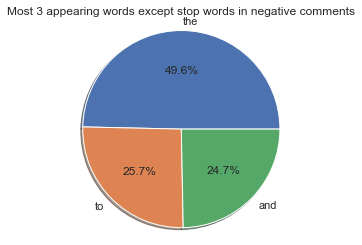

In [8]:
###### APPLYIG COUNT VECTORIZING TO THE DATA ######
vectorizer = CountVectorizer(ngram_range=(1, 1))
vector = vectorizer.fit_transform(data["tokens"])
vector_df = pd.DataFrame(vector.toarray())
words_list = list(vectorizer.vocabulary_.keys())
words_list.sort()
vector_df["CLASS"] = data["CLASS"]
words_list.append("CLASS")
vector_df.columns = words_list

##### GET NUMBER OF WORDS FOR POSITIVE AND NEGATIVE ######

statistic_df = pd.DataFrame(index=["sum class negative", "sum class positive"], columns=vector_df.columns.values)
statistic_df.loc["sum class negative"] = vector_df[vector_df["CLASS"]==0].sum(axis=0)
statistic_df.loc["sum class positive"] = vector_df[vector_df["CLASS"]==1].sum(axis=0)
del statistic_df["CLASS"]

##### PRINT MOST 3 APPEARING WORDS IN NEGATIVE ######

statistic_df = statistic_df.iloc[:, np.argsort(statistic_df.loc["sum class negative"])]
sum_of_negative_words = statistic_df.loc["sum class negative"].sum(axis=0)

print('Maximum 1st occured word in negative with stop words and its frequency: %s - %f' % (statistic_df.iloc[:,-1].name, statistic_df.iloc[:,-1]["sum class negative"]/sum_of_negative_words ))
print('Maximum 1st occured word in negative with stop words its frequency: %s - %f' % (statistic_df.iloc[:,-2].name, statistic_df.iloc[:,-2]["sum class negative"]/sum_of_negative_words ))
print('Maximum 1st occured word in negative with stop words its frequency: %s - %f' % (statistic_df.iloc[:,-3].name, statistic_df.iloc[:,-3]["sum class negative"]/sum_of_negative_words ))

plt.figure(0)
plt.title('Most 3 appearing words except stop words in negative comments')
plt.pie([statistic_df.iloc[:,-1]["sum class negative"], statistic_df.iloc[:,-2]["sum class negative"], statistic_df.iloc[:,-3]["sum class negative"]],
        labels=[statistic_df.iloc[:,-1].name, statistic_df.iloc[:,-2].name, statistic_df.iloc[:,-3].name], autopct='%1.1f%%', shadow=True)
plt.axis('equal')


Maximum 1st occured word in positive with stop words and its frequency: the - 0.056115
Maximum 1st occured word in positive with stop words its frequency: and - 0.031389
Maximum 1st occured word in positive with stop words its frequency: to - 0.026557


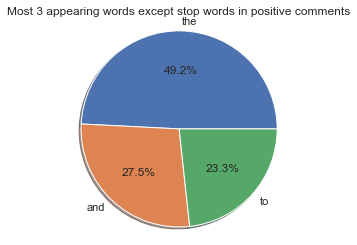

In [9]:
##### PRINT MOST 3 APPEARING WORDS IN POSITIVE ######

statistic_df = statistic_df.iloc[:, np.argsort(statistic_df.loc["sum class positive"])]
sum_of_positive_words = statistic_df.loc["sum class positive"].sum(axis=0)

print('Maximum 1st occured word in positive with stop words and its frequency: %s - %f' % (statistic_df.iloc[:,-1].name, statistic_df.iloc[:,-1]["sum class positive"]/sum_of_positive_words ))
print('Maximum 1st occured word in positive with stop words its frequency: %s - %f' % (statistic_df.iloc[:,-2].name, statistic_df.iloc[:,-2]["sum class positive"]/sum_of_positive_words ))
print('Maximum 1st occured word in positive with stop words its frequency: %s - %f' % (statistic_df.iloc[:,-3].name, statistic_df.iloc[:,-3]["sum class positive"]/sum_of_positive_words ))

plt.figure(1)
plt.title('Most 3 appearing words except stop words in positive comments')
plt.pie([statistic_df.iloc[:,-1]["sum class positive"], statistic_df.iloc[:,-2]["sum class positive"], statistic_df.iloc[:,-3]["sum class positive"]],
        labels=[statistic_df.iloc[:,-1].name, statistic_df.iloc[:,-2].name, statistic_df.iloc[:,-3].name], autopct='%1.1f%%', shadow=True)
plt.axis('equal')

del vector_df # To free memory allocation

# Implementing the Naive Bayes Classifier

In this part, I have implement NaiveBayesClassifier class. By this class, you can train your model and data according to usage of the laplace smoothing. You can make a prediction by using these hyperparameters:
 
- **is_bigram**: If you want to vectorize your data as bigram, you can set "True".
- **stop_words**: If you want to eliminate stop words in prediction, you can set these words.
- **is_tfidf**: If you want to use TF-IDF vectorizing instead Count Vectorizing, which is default, you can set True.

I have use log probability with laplace smoothing to prevent 0 probabilities in likelihood of Naive Bayes formula. In addition to this, these methods are scale the huge and tiny probabilities, and helps us to get more accurate probabilities. 

In [10]:
#I have split the data as train and test by using this method

def train_test_split_df(data, pure_data, test_size=0.20):
    test_start_index = data.shape[0] - int(data.shape[0] * test_size)
    return (data.iloc[0:test_start_index,:], pure_data.iloc[test_start_index:,:].reset_index())

In [42]:
class NaiveBayesClassifier:
    
    def __init__(self):
        self.__feature_count_dictionary_for_classes = {}
        self.__classes_word_numbers_dictionary = {}
        self.__dataset = pd.DataFrame()
        self.__prediction_list = []
        self.__input_df = pd.DataFrame()
        self.__class_word_score_dict = {}
        self.__class_prediction_probability = {} # In this directory, each class includes probability of words used in prediction. We will use this in modul analysis.
        self.__is_tfidf = False
        self.__is_bigram = False
        self.__stop_words = None
        
    ###################### Getter functions of some variables ######################
    def get_word_probability(self):
        return self.__class_prediction_probability
    def get_word_probability_differences(self, is_words_in_true_predicted=True): # This method returns the probability difference of words in different classes placed in true predicted documents
                                                # We need to filter unseen words in true predicted rows of input.
        word_probability_difference_for_class = {}
        for class_name in self.__dataset["CLASS"].unique():
    
            word_probability_difference_for_class[class_name] = {}
            vectorizer1 = self.__initialize_count_vectorizer(self.__is_bigram, stop_words=self.__stop_words, is_tfidf=self.__is_tfidf)
            if is_words_in_true_predicted:
                vectorizer1.fit(self.__input_df[( self.__input_df.loc[:,'CLASS']- pd.DataFrame(self.__prediction_list)[0] == 0) & (self.__input_df['CLASS']==class_name)]["tokens"])
            else:
                vectorizer1.fit(self.__input_df[( self.__input_df.loc[:,'CLASS']- pd.DataFrame(self.__prediction_list)[0] != 0) & (self.__input_df['CLASS']==class_name)]["tokens"])

            tokens_occured_in_true_predicted_for_a_class = list(vectorizer1.vocabulary_.keys())
            
            for word in list(self.__class_prediction_probability[class_name].keys()):
                if word in tokens_occured_in_true_predicted_for_a_class:
                    probability_difference_with_other_words = []
                    for other_class_name in np.delete(self.__dataset["CLASS"].unique(),  self.__dataset["CLASS"].unique().tolist().index(class_name)):
                        probability_difference_with_other_words.append(self.__class_prediction_probability[other_class_name][word]-self.__class_prediction_probability[class_name][word])

                    word_probability_difference_for_class[class_name][word] = max(probability_difference_with_other_words)

        return word_probability_difference_for_class
    
    def get_prediction_list(self):
        return self.__prediction_list
        
    def get_input_df(self):
        return self.__input_df
    
    def get_feature_df(self):
        return self.__feature_count_dictionary_for_classes
    
    def accuracy(self):
        actual_labels_df = self.__input_df["CLASS"].copy()
        predicted_labels_df = pd.DataFrame(self.__prediction_list)
        # Because the actual labels index is not start from 0, I resett its index
        actual_labels_df = actual_labels_df.reset_index(drop=True).to_frame()
        actual_labels_df.columns = [0]
        difference = predicted_labels_df.sub(actual_labels_df)
        return difference[difference.iloc[:,0]==0].shape[0] / actual_labels_df.shape[0]

    
    ###################### Naive Bayes with Laplace Smoothing ######################

    def train(self, dataset): #The classes should be placed end of dataframe in trained data
        for class_name in dataset["CLASS"].unique():
            self.__class_prediction_probability[class_name] = {} 
            self.__feature_count_dictionary_for_classes[class_name] = {}
            class_df = dataset[dataset["CLASS"]==class_name]
            for word in dataset.iloc[:,:-1].columns.values.tolist():
                self.__feature_count_dictionary_for_classes[class_name][word] = np.sum(class_df[word]) +1
        self.__dataset = dataset

    
    def predict_with_laplace_smoothing(self, input_df, is_bigram=False, stop_words=None, is_tfidf=False):

        self.__is_tfidf = is_tfidf
        self.__is_bigram = is_bigram
        self.__stop_words = stop_words
        
        self.__input_df = input_df.copy()
        total_words_in_classes, class_probabilities = self.__calculate_probailities_of_classes_and_total_words_in_each_classes()
        self.__do_laplace_for_unseen_data_in_trian(is_bigram, total_words_in_classes, stop_words=stop_words, is_tfidf=is_tfidf)
                
        for row in input_df.index.tolist():
            #If the bigram is used, max feature is set as 50576 because of memory issue
            vectorizer1 = self.__initialize_count_vectorizer(is_bigram, stop_words=stop_words, is_tfidf=is_tfidf)
            
            #Fit count vectorizer for each row in test data
            vector_train = vectorizer1.fit_transform([input_df["tokens"][row]])
            splitted_tokens = list(vectorizer1.vocabulary_.keys())
            probability_dict = {}
            
            #Calculate prior for each class
            for class_name in list(self.__feature_count_dictionary_for_classes.keys()):
                probability_joint = class_probabilities[class_name]
                for token in splitted_tokens:
                    probability_of_word_given_class = self.__feature_count_dictionary_for_classes[class_name][token] / total_words_in_classes[class_name]
                    probability_joint += np.log(probability_of_word_given_class)
                    self.__class_prediction_probability[class_name][token] = probability_of_word_given_class
                probability_dict[class_name] = probability_joint
                
            #Prediction
            predicted_label = max(probability_dict.items(), key=operator.itemgetter(1))[0]
            self.__prediction_list.append(predicted_label)       
    
    ###################### Naive Bayes without Laplace Smoothing ######################
    def train_without_laplace(self, dataset): #The classes should be placed end of dataframe in trained data
        for class_name in dataset["CLASS"].unique(): 
            self.__feature_count_dictionary_for_classes[class_name] = {}
            class_df = dataset[dataset["CLASS"]==class_name]
            for word in dataset.iloc[:,:-1].columns.values.tolist():
                self.__feature_count_dictionary_for_classes[class_name][word] = np.sum(class_df[word])
        self.__dataset = dataset

    
    def predict_without_laplace_smoothing(self, input_df, is_bigram=False, stop_words=None, is_tfidf=False):

        self.__input_df = input_df.copy()
        total_words_in_classes, class_probabilities = self.__calculate_probailities_of_classes_and_total_words_in_each_classes()
                
        for row in input_df.index.tolist():
            #If the bigram is used, max feature is set as 50576 because of memory issue
            vectorizer1 = self.__initialize_count_vectorizer(is_bigram, stop_words=stop_words, is_tfidf=is_tfidf)
            
            #Fit count vectorizer for each row in test data
            vector_train = vectorizer1.fit_transform([input_df["tokens"][row]])
            splitted_tokens = list(vectorizer1.vocabulary_.keys())
            probability_dict = {}
            
            #Calculate prior for each class
            for class_name in list(self.__feature_count_dictionary_for_classes.keys()):
                probability_joint = class_probabilities[class_name]
                for token in splitted_tokens:
                    if token not in self.__feature_count_dictionary_for_classes[class_name]:
                        probability_joint += 0
                    else:
                        probability_joint += np.log(self.__feature_count_dictionary_for_classes[class_name][token] / total_words_in_classes[class_name])
                probability_dict[class_name] = probability_joint
                
            #Prediction
            predicted_label = max(probability_dict.items(), key=operator.itemgetter(1))[0]
            self.__prediction_list.append(predicted_label)       
            
    
    ###################### Private methods ######################
    def __do_laplace_for_unseen_data_in_trian(self, is_bigram, total_words_in_classes, stop_words=None, is_tfidf=False):
        key_list = list(self.__feature_count_dictionary_for_classes.keys())
        if(is_bigram):
            for class_name in key_list:
                vectorizer = None
                if(is_tfidf):
                    vectorizer = TfidfVectorizer(ngram_range=(2,2), stop_words=stop_words)
                else:
                    vectorizer = CountVectorizer(ngram_range=(2,2), stop_words=stop_words)

                for token in list(vectorizer.fit(self.__input_df["tokens"]).vocabulary_.keys()):
                    if token not in self.__feature_count_dictionary_for_classes[class_name]:
                        self.__feature_count_dictionary_for_classes[class_name][token] = 1
                        total_words_in_classes[class_name] += 1
        else:
            for class_name in key_list:
                for token in list(CountVectorizer(ngram_range=(1,1), stop_words=stop_words).fit(self.__input_df["tokens"]).vocabulary_.keys()):
                    if token not in self.__feature_count_dictionary_for_classes[class_name]:
                        self.__feature_count_dictionary_for_classes[class_name][token] = 1
                        total_words_in_classes[class_name] += 1
                        
    def __calculate_probailities_of_classes_and_total_words_in_each_classes(self):
        class_probabilities = {}
        total_words_in_classes = {}
        for class_name in list(self.__feature_count_dictionary_for_classes.keys()):
            class_probabilities[class_name] = np.log(self.__dataset[ self.__dataset["CLASS"] == class_name].shape[0] / self.__dataset.shape[0])
            total_words_in_classes[class_name] = sum(self.__feature_count_dictionary_for_classes[class_name].values())        
        return (total_words_in_classes, class_probabilities)
    
    def __initialize_count_vectorizer(self, is_bigram, stop_words=None, is_tfidf=False):
        vectorizer1 = None
        if(is_bigram):
            if(is_tfidf):
                vectorizer1 = TfidfVectorizer(max_features=50576, ngram_range=(2,2), stop_words=stop_words)
            else:
                vectorizer1 = CountVectorizer(max_features=50576, ngram_range=(2,2), stop_words=stop_words )   
        else:
            if(is_tfidf):
                vectorizer1 = TfidfVectorizer(ngram_range=(1,1), stop_words=stop_words )
            else:
                vectorizer1 = CountVectorizer(ngram_range=(1,1), stop_words=stop_words )
            
        return vectorizer1

# Model Evaluation

In the modul analysis part, I aimed to analyze the hyper parameters of the model with . Firstly, I train and test the model without applying laplace smoothing in the likelihood calculation. In each part, I extract the feature according to unigram and bigram. In the training model with used laplace smoothing part, I extract the features according to these:
- **For Unigram**:
     - Unigram with Count Vectorizer 
     - Unigram with TF-IDF Vectorizing
     - Unigram with Count Vectorizer and stop words
     - Unigram with stop words and TF-IDF Vectorizing
     
     <br>
- **For Bigram**:
     - Bigram with Count Vectorizer 
     - Bigram with TF-IDF Vectorizing
     - Bigram with Count Vectorizer and stop words
     - Bigram with stop words and TF-IDF Vectorizing

### 1) Without Laplace Smoothing

Firstly, I didn't use laplace smoothing to observe difference of using the laplace smoothing:

- **Unigram**:

In [12]:
### UNIGRAM DATA PREPARING #####

vectorizer1 = CountVectorizer()
vector_train = vectorizer1.fit_transform(data["tokens"])
df = pd.DataFrame(vector_train.toarray())
listt = list(vectorizer1.vocabulary_.keys())
listt.sort()
df.columns = listt
df["CLASS"] = data["CLASS"]

train_df, test_df = train_test_split_df(df, data, test_size=0.20)

In [13]:
model = NaiveBayesClassifier()
model.train_without_laplace(train_df)
model.predict_without_laplace_smoothing(test_df, is_bigram=False, stop_words=None)
print("Accuracy with UNIGRAM without laplace: ",model.accuracy())

Accuracy with UNIGRAM without laplace:  0.6158690176322418


- **Bigram**:

In [14]:
### BIGRAM DATA PREPARING #####
test_size= 0.20
test_start_index = data.shape[0] - int(data.shape[0] * test_size)

vectorizer_bigram = CountVectorizer(max_features=50576, ngram_range = (2, 2))
bigram_vector_train = vectorizer_bigram.fit_transform(data.iloc[:test_start_index,-2])

bigram_df = pd.DataFrame(bigram_vector_train.toarray())
listt = list(vectorizer_bigram.vocabulary_.keys())
listt.sort()
bigram_df.columns = listt
bigram_df["CLASS"] = data["CLASS"]

listt = list(vectorizer_bigram.vocabulary_.keys())
listt.sort()

bigram_train_df = bigram_df
bigram_test_df = data.iloc[test_start_index:,:]

#I have drop this index because of the comment only includes 1 word
bigram_test_df = bigram_test_df.reset_index()
bigram_test_df = bigram_test_df.drop([1939])
bigram_test_df = bigram_test_df.reset_index()

In [15]:
model = NaiveBayesClassifier()
model.train_without_laplace(bigram_train_df)
model.predict_without_laplace_smoothing(bigram_test_df, is_bigram=True, stop_words=None)
print("Accuracy with BIGRAM without laplace",model.accuracy())

Accuracy with BIGRAM without laplace 0.7240655186896262


### 2) With Laplace Smoothing

As you can see here, the most accurate results are given with laplace smoothing. We can look at :

- **Unigram** with **Count Vectorizer**:

In [16]:
### UNIGRAM DATA PREPARING #####

vectorizer1 = CountVectorizer()
vector_train = vectorizer1.fit_transform(data["tokens"])
df = pd.DataFrame(vector_train.toarray())
listt = list(vectorizer1.vocabulary_.keys())
listt.sort()
df.columns = listt
df["CLASS"] = data["CLASS"]

train_df, test_df = train_test_split_df(df, data, test_size=0.20)

In [17]:
model_unigram = NaiveBayesClassifier()
model_unigram.train(train_df)
model_unigram.predict_with_laplace_smoothing(test_df, is_bigram=False, stop_words=None)
acc_unigram = model_unigram.accuracy()
print("Accuracy with UNIGRAM: ",acc_unigram)

Accuracy with UNIGRAM:  0.8182199832073888


- **Unigram** with **TF-IDF Vectorizing**:

In [46]:
### UNIGRAM DATA PREPARING #####

vectorizer1 = TfidfVectorizer()
vector_train = vectorizer1.fit_transform(data["tokens"])
df = pd.DataFrame(vector_train.toarray())
listt = list(vectorizer1.vocabulary_.keys())
listt.sort()
df.columns = listt
df["CLASS"] = data["CLASS"]

train_df, test_df = train_test_split_df(df, data, test_size=0.20)

In [47]:
model_unigram_tfidf = NaiveBayesClassifier()
model_unigram_tfidf.train(train_df)
model_unigram_tfidf.predict_with_laplace_smoothing(test_df, is_bigram=False, stop_words= None, is_tfidf=True)
acc_unigram_tfidf = model_unigram_tfidf.accuracy()
print("Accuracy with UNIGRAM and TF-IDF: ",acc_unigram_tfidf)

Accuracy with UNIGRAM and TF-IDF:  0.8350125944584383


- **Unigram** with **Count Vectorizer** and **without stop words**:

In [20]:
### UNIGRAM DATA PREPARING #####

vectorizer1 = CountVectorizer(stop_words= ENGLISH_STOP_WORDS)
vector_train = vectorizer1.fit_transform(data["tokens"])
df = pd.DataFrame(vector_train.toarray())
listt = list(vectorizer1.vocabulary_.keys())
listt.sort()
df.columns = listt
df["CLASS"] = data["CLASS"]

train_df, test_df = train_test_split_df(df, data, test_size=0.20)

In [21]:
model_unigram_stop_words = NaiveBayesClassifier()
model_unigram_stop_words.train(train_df)
model_unigram_stop_words.predict_with_laplace_smoothing(test_df, is_bigram=False, stop_words= ENGLISH_STOP_WORDS)
acc_unigram_stop_words = model_unigram_stop_words.accuracy()
print("Accuracy with UNIGRAM and without STOP WORDS: ",acc_unigram_stop_words)

Accuracy with UNIGRAM and without STOP WORDS:  0.8031066330814441


- **Unigram** without **stop words** and **TF-IDF Vectorizing**:

In [22]:
### UNIGRAM DATA PREPARING #####

vectorizer1 = TfidfVectorizer(stop_words= ENGLISH_STOP_WORDS)
vector_train = vectorizer1.fit_transform(data["tokens"])
df = pd.DataFrame(vector_train.toarray())
listt = list(vectorizer1.vocabulary_.keys())
listt.sort()
df.columns = listt
df["CLASS"] = data["CLASS"]

train_df, test_df = train_test_split_df(df, data, test_size=0.20)

In [23]:
model_unigram_stop_words_tfidf = NaiveBayesClassifier()
model_unigram_stop_words_tfidf.train(train_df)
model_unigram_stop_words_tfidf.predict_with_laplace_smoothing(test_df, is_bigram=False, stop_words= ENGLISH_STOP_WORDS, is_tfidf=True)
acc_unigram_stop_words_tfidf = model_unigram_stop_words_tfidf.accuracy()
print("Accuracy with UNIGRAM, TF-IDF and without STOP WORDS: ", acc_unigram_stop_words_tfidf)

Accuracy with UNIGRAM, TF-IDF and without STOP WORDS:  0.8278757346767422


- **Bigram** with **Count Vectorizer**:

I have set max features of count vectorizer as 50576 because of memory issues. This value is recommended to train NLP works with  big data.

In [24]:
### BIGRAM DATA PREPARING #####
test_size= 0.20
test_start_index = data.shape[0] - int(data.shape[0] * test_size)

vectorizer_bigram = CountVectorizer(max_features=50576, ngram_range = (2, 2))
bigram_vector_train = vectorizer_bigram.fit_transform(data.iloc[:test_start_index,-2])

bigram_df = pd.DataFrame(bigram_vector_train.toarray())
listt = list(vectorizer_bigram.vocabulary_.keys())
listt.sort()
bigram_df.columns = listt
bigram_df["CLASS"] = data["CLASS"]

listt = list(vectorizer_bigram.vocabulary_.keys())
listt.sort()

bigram_train_df = bigram_df
bigram_test_df = data.iloc[test_start_index:,:]
bigram_test_df = bigram_test_df.reset_index()

#I have drop this index because of the comment only includes 1 word
bigram_test_df = bigram_test_df.drop([1939])
bigram_test_df = bigram_test_df.reset_index()

In [25]:
model_bigram = NaiveBayesClassifier()
model_bigram.train(bigram_train_df)
model_bigram.predict_with_laplace_smoothing(bigram_test_df, is_bigram=True, stop_words=None)
acc_bigram = model_bigram.accuracy()
print("Accuracy with BIGRAM", acc_bigram)

Accuracy with BIGRAM 0.8559428811423772


- **Bigram** with **TF-IDF Vectorizing**:

In [43]:
### BIGRAM DATA PREPARING #####
test_size= 0.20
test_start_index = data.shape[0] - int(data.shape[0] * test_size)

vectorizer_bigram = TfidfVectorizer(max_features=50576, ngram_range = (2, 2))
bigram_vector_train = vectorizer_bigram.fit_transform(data.iloc[:test_start_index,-2])

bigram_df = pd.DataFrame(bigram_vector_train.toarray())
listt = list(vectorizer_bigram.vocabulary_.keys())
listt.sort()
bigram_df.columns = listt
bigram_df["CLASS"] = data["CLASS"]

listt = list(vectorizer_bigram.vocabulary_.keys())
listt.sort()

bigram_train_df = bigram_df
bigram_test_df = data.iloc[test_start_index:,:]
bigram_test_df = bigram_test_df.reset_index()

#I have drop this index because of the comment only includes 1 word
bigram_test_df = bigram_test_df.drop([1939])
bigram_test_df = bigram_test_df.reset_index()

In [44]:
model_bigram_tfidf = NaiveBayesClassifier()
model_bigram_tfidf.train(bigram_train_df)
model_bigram_tfidf.predict_with_laplace_smoothing(bigram_test_df, is_bigram=True, stop_words=None, is_tfidf=True )
acc_bigram_tfidf = model_bigram_tfidf.accuracy()
print("Accuracy with BIGRAM and TF-IDF", acc_bigram_tfidf)

Accuracy with BIGRAM and TF-IDF 0.8660226795464091


- **Bigram** with **Count Vectorizer** and **without stop words**: 

In [28]:
### BIGRAM DATA PREPARING #####
test_size= 0.20
test_start_index = data.shape[0] - int(data.shape[0] * test_size)

vectorizer_bigram = CountVectorizer(max_features=50576, ngram_range = (2, 2), stop_words= ENGLISH_STOP_WORDS)
bigram_vector_train = vectorizer_bigram.fit_transform(data.iloc[:test_start_index,-2])

bigram_df = pd.DataFrame(bigram_vector_train.toarray())
listt = list(vectorizer_bigram.vocabulary_.keys())
listt.sort()
bigram_df.columns = listt
bigram_df["CLASS"] = data["CLASS"]

listt = list(vectorizer_bigram.vocabulary_.keys())
listt.sort()

bigram_train_df = bigram_df
bigram_test_df = data.iloc[test_start_index:,:]
bigram_test_df = bigram_test_df.reset_index()

#I have drop this index because of the comment only includes 1 word
bigram_test_df = bigram_test_df.drop([1939])
bigram_test_df = bigram_test_df.reset_index()

In [29]:
model_bigram_stop_words = NaiveBayesClassifier()
model_bigram_stop_words.train(bigram_train_df)
model_bigram_stop_words.predict_with_laplace_smoothing(bigram_test_df, is_bigram=True, stop_words=ENGLISH_STOP_WORDS)
acc_bigram_stop_words = model_bigram_stop_words.accuracy()
print("Accuracy with BIGRAM and without STOP WORDS", acc_bigram_stop_words)

Accuracy with BIGRAM and without STOP WORDS 0.7102057958840823


- **Bigram** without **stop words** and **TF-IDF Vectorizing**: 

In [30]:
### BIGRAM DATA PREPARING #####
test_size= 0.20
test_start_index = data.shape[0] - int(data.shape[0] * test_size)

vectorizer_bigram = TfidfVectorizer(max_features=50576, ngram_range = (2, 2), stop_words= ENGLISH_STOP_WORDS)
bigram_vector_train = vectorizer_bigram.fit_transform(data.iloc[:test_start_index,-2])

bigram_df = pd.DataFrame(bigram_vector_train.toarray())
listt = list(vectorizer_bigram.vocabulary_.keys())
listt.sort()
bigram_df.columns = listt
bigram_df["CLASS"] = data["CLASS"]

listt = list(vectorizer_bigram.vocabulary_.keys())
listt.sort()

bigram_train_df = bigram_df
bigram_test_df = data.iloc[test_start_index:,:]
bigram_test_df = bigram_test_df.reset_index()

#I have drop this index because of the comment only includes 1 word
bigram_test_df = bigram_test_df.drop([1939])
bigram_test_df = bigram_test_df.reset_index()

In [31]:
model_bigram_stop_words_tf_idf = NaiveBayesClassifier()
model_bigram_stop_words_tf_idf.train(bigram_train_df)
model_bigram_stop_words_tf_idf.predict_with_laplace_smoothing(bigram_test_df, is_bigram=True, stop_words=ENGLISH_STOP_WORDS, is_tfidf=True)
acc_bigram_stop_words_tf_idf = model_bigram_stop_words_tf_idf.accuracy()
print("Accuracy with BIGRAM, TF-IDF and without STOP WORDS: ", acc_bigram_stop_words_tf_idf)

Accuracy with BIGRAM, TF-IDF and without STOP WORDS:  0.7656446871062579


We can see the accuracies:

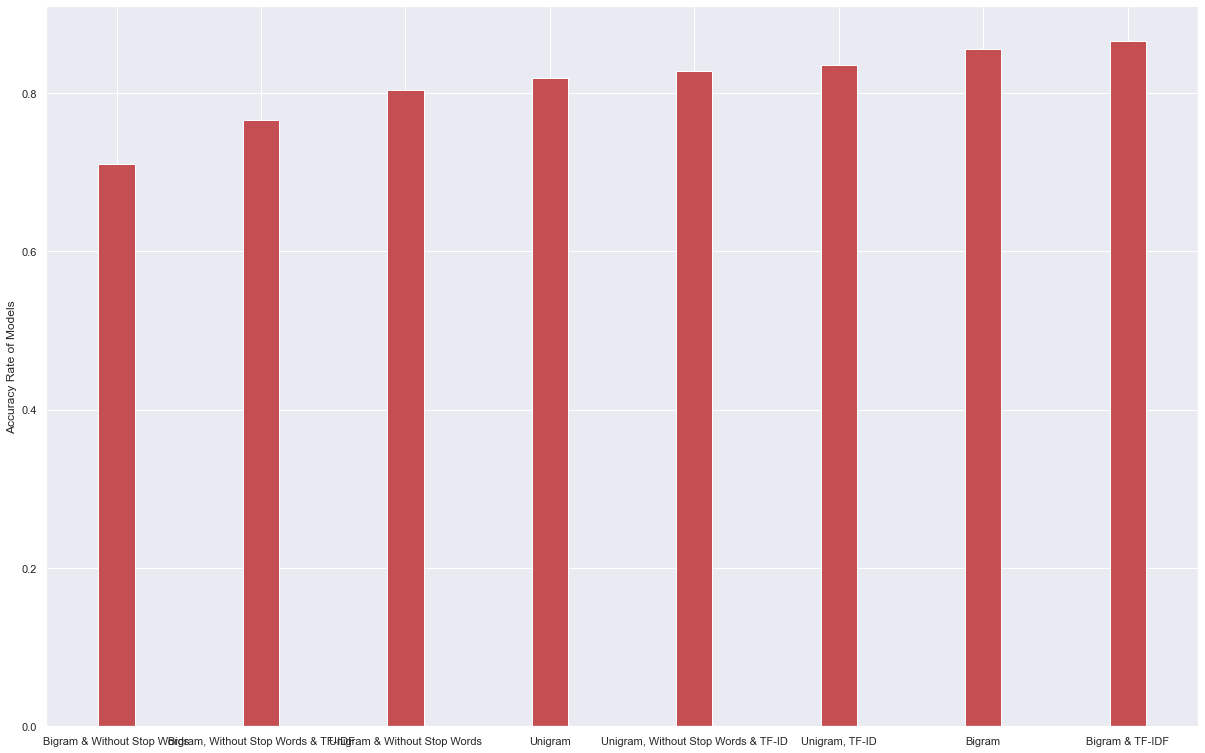

In [32]:
fig = plt.figure(figsize=(16, 10))
ax = fig.add_axes([0,0,1,1])
langs = ['Bigram & Without Stop Words', 
         'Bigram, Without Stop Words & TF-IDF', 
         'Unigram & Without Stop Words', 
         'Unigram', 
         'Unigram, Without Stop Words & TF-ID', 
         'Unigram, TF-ID',
         'Bigram',
         'Bigram & TF-IDF', 
        ]

knn_accuracy = [acc_bigram_stop_words, 
                acc_bigram_stop_words_tf_idf, 
                acc_unigram_stop_words, 
                acc_unigram, 
                acc_unigram_stop_words_tfidf,
                acc_unigram_tfidf,
                acc_bigram,
                acc_bigram_tfidf]
barWidth = 0.25

r1 = np.arange(len(langs))
r2 = [x + barWidth for x in r1] 

plt.bar(r2,knn_accuracy,color='r', width=barWidth )
  
plt.ylabel('Accuracy Rate of Models')
  
plt.xticks([r + barWidth for r in range(0,len(langs))], langs)

plt.show()

As we can see, the most accurate result is given with **Bigram & TF-IDF** model.

|Models | Accuracy |
| :- | --- |
| Bigram & TF-IDF | 0.866 |
| Bigram | 0.855 |
| Unigram, TF-ID | 0.835 |
| Unigram, Without Stop Words & TF-ID | 0.827 |
| Unigram | 0.818 |
| Unigram & Without Stop Words | 0.803 |
| Bigram, Without Stop Words & TF-IDF | 0.765 |
| Bigram & Without Stop Words | 0.710 |

If we look at the bigram and unigram results individual, we can say that taken of the words as bigram makes the model more accurate than unigram. The cause of this can be said that the meanings of the words can be change according to using in place:

|Models| Accuracy |
| :- | --- |
| Bigram | 0.855 |  
| Unigram | 0.818 |

Also, the TF-IDF Vectorizing gives more scaled points to words. Therefore, it gives more accurate results than directly counting their occurence in classes.

|Models| Accuracy |
| :- | --- |
| Bigram & TF-IDF |0.866 |  
| Bigram |  0.855 |

# Error Analysis

We will look the **bigram and TF-IDF** model for error analysis.

In each class, If we look at the the biggest probabilities of words expect stop words (We can say that, number of thestop words will be equal both positive and negative classes) which falsely predicted as positive but it is negative, their probability values, also we can say that their values are mostly equal in each class. Therefore, the little differences cause the prediction as false. For example, most biggest probability value is given by **camera** and **lens** for both classes and their value also extremely close each other.

In [116]:
false_predicted_comment = test_df[( test_df.loc[:,'CLASS']- pd.DataFrame(model_unigram_tfidf.get_prediction_list())[0] != 0) & (test_df['CLASS']==0)].iloc[1,:]["tokens"]

In [130]:
vectorizer = CountVectorizer(stop_words=ENGLISH_STOP_WORDS)
vector = vectorizer.fit_transform([false_predicted_comment])

splitted_words = list(vectorizer.vocabulary_.keys())
print(splitted_words)

['camera', 'poor', 'lens', '1x', 'zoom', 'barrel', 'spherical', 'distortion', 'enormous', 'try', 'taking', 'picture', 'tiled', 'wall', 'image', 'quality', 'viewed', '100', 'scaled', 'computer', 'monitor', 'ok', 'color', 'fidelity', 'using', 'flash', 'auto', 'white', 'balance']


In [134]:
total_words_in_positive = sum(model_unigram_tfidf.get_feature_df()[1].values())   


class_name=1
probability_dict = {}
probability_dict[class_name] = {}

for token in splitted_words:
    probability_of_word_given_class = log(model_unigram_tfidf.get_feature_df()[class_name][token] / total_words_in_positive)
    probability_dict[class_name][token] = probability_of_word_given_class
    
#Prediction
word_likelihood_in_positive1 = sorted(probability_dict[1], key=probability_dict[1].get, reverse=True)[0]
word_likelihood_in_positive2 = sorted(probability_dict[1], key=probability_dict[1].get, reverse=True)[1]
word_likelihood_in_positive3 = sorted(probability_dict[1], key=probability_dict[1].get, reverse=True)[2]
word_likelihood_in_positive4 = sorted(probability_dict[1], key=probability_dict[1].get, reverse=True)[3]
word_likelihood_in_positive5 = sorted(probability_dict[1], key=probability_dict[1].get, reverse=True)[4]
word_likelihood_in_positive6 = sorted(probability_dict[1], key=probability_dict[1].get, reverse=True)[5]
word_likelihood_in_positive7 = sorted(probability_dict[1], key=probability_dict[1].get, reverse=True)[6]
print("Word: " + word_likelihood_in_positive1+" *** Probability in class positive: "+str(probability_dict[1][word_likelihood_in_positive1]) )  
print("Word: " + word_likelihood_in_positive2+" *** Probability in class positive: "+str(probability_dict[1][word_likelihood_in_positive2]) )  
print("Word: " + word_likelihood_in_positive3+" *** Probability in class positive: "+str(probability_dict[1][word_likelihood_in_positive3]) )  
print("Word: " + word_likelihood_in_positive4+" *** Probability in class positive: "+str(probability_dict[1][word_likelihood_in_positive4]) )  
print("Word: " + word_likelihood_in_positive5+" *** Probability in class positive: "+str(probability_dict[1][word_likelihood_in_positive5]) )  
print("Word: " + word_likelihood_in_positive6+" *** Probability in class positive: "+str(probability_dict[1][word_likelihood_in_positive6]) )  
print("Word: " + word_likelihood_in_positive7+" *** Probability in class positive: "+str(probability_dict[1][word_likelihood_in_positive7]) )  

Word: camera *** Probability in class positive: -6.847764119542066
Word: lens *** Probability in class positive: -7.460139361234997
Word: using *** Probability in class positive: -7.713731867464607
Word: quality *** Probability in class positive: -7.738111145426693
Word: computer *** Probability in class positive: -8.313662039748673
Word: picture *** Probability in class positive: -8.389795253179997
Word: flash *** Probability in class positive: -8.4262352895722


In [135]:
total_words_in_negative = sum(model_unigram_tfidf.get_feature_df()[0].values())   


class_name=0
probability_dict = {}
probability_dict[class_name] = {}

for token in splitted_words:
    probability_of_word_given_class = log(model_unigram_tfidf.get_feature_df()[class_name][token] / total_words_in_negative)
    probability_dict[class_name][token] = probability_of_word_given_class
    
#Prediction
word_likelihood_in_negative1 = sorted(probability_dict[0], key=probability_dict[0].get, reverse=True)[0]
word_likelihood_in_negative2 = sorted(probability_dict[0], key=probability_dict[0].get, reverse=True)[1]
word_likelihood_in_negative3 = sorted(probability_dict[0], key=probability_dict[0].get, reverse=True)[2]
word_likelihood_in_negative4 = sorted(probability_dict[0], key=probability_dict[0].get, reverse=True)[3]
word_likelihood_in_negative5 = sorted(probability_dict[0], key=probability_dict[0].get, reverse=True)[4]
word_likelihood_in_negative6 = sorted(probability_dict[0], key=probability_dict[0].get, reverse=True)[5]
word_likelihood_in_negative7 = sorted(probability_dict[0], key=probability_dict[0].get, reverse=True)[6]
print("Word: " + word_likelihood_in_negative1+" *** Probability in class positive: "+str(probability_dict[0][word_likelihood_in_negative1]) )  
print("Word: " + word_likelihood_in_negative2+" *** Probability in class positive: "+str(probability_dict[0][word_likelihood_in_negative2]) )  
print("Word: " + word_likelihood_in_negative3+" *** Probability in class positive: "+str(probability_dict[0][word_likelihood_in_negative3]) )  
print("Word: " + word_likelihood_in_negative4+" *** Probability in class positive: "+str(probability_dict[0][word_likelihood_in_negative4]) )  
print("Word: " + word_likelihood_in_negative5+" *** Probability in class positive: "+str(probability_dict[0][word_likelihood_in_negative5]) )  
print("Word: " + word_likelihood_in_negative6+" *** Probability in class positive: "+str(probability_dict[0][word_likelihood_in_negative6]) )  
print("Word: " + word_likelihood_in_negative7+" *** Probability in class positive: "+str(probability_dict[0][word_likelihood_in_negative7]) )  

Word: camera *** Probability in class positive: -6.858499669909265
Word: quality *** Probability in class positive: -7.741476164561545
Word: computer *** Probability in class positive: -7.997515148378714
Word: try *** Probability in class positive: -8.05716273433073
Word: using *** Probability in class positive: -8.093522036100094
Word: lens *** Probability in class positive: -8.103718880573298
Word: poor *** Probability in class positive: -8.108852384499853


# Modul Analysis

### (a) Analyzing effect of the words on prediction

I chose the **Unigram & TF-IDF** model to analyze effects of the words on prediction. I will explain how I evaluate the words by analyzing their effects on prediction: For words which has an effect on positive with its presence, I got the words which has biggest positive number of probability difference with negative class and occured in true predicted documents. Also to evaluate their absence, I look at the least probability difference. 

**NOT:** I don't get absolute of the difference, so it means that the word which have a negative number of probability will positively effect the prediction its absence.

If we look at the first 10 words whose presence most strongly predicts that the review is positive, these are **great, and, easy, love, best, is, excellent, use, as**, and **well**

In [34]:
probability_true_predicted = model_unigram_tfidf.get_word_probability_differences()

In [35]:
print("1st most affect of presence to predict positive: ",sorted(probability_true_predicted[1], key=probability_true_predicted[1].get, reverse=False)[0])
print("2st most affect of presence to predict positive: ",sorted(probability_true_predicted[1], key=probability_true_predicted[1].get, reverse=False)[1])
print("3st most affect of presence to predict positive: ",sorted(probability_true_predicted[1], key=probability_true_predicted[1].get, reverse=False)[2])
print("4st most affect of presence to predict positive: ",sorted(probability_true_predicted[1], key=probability_true_predicted[1].get, reverse=False)[3])
print("5st most affect of presence to predict positive: ",sorted(probability_true_predicted[1], key=probability_true_predicted[1].get, reverse=False)[4])
print("6st most affect of presence to predict positive: ",sorted(probability_true_predicted[1], key=probability_true_predicted[1].get, reverse=False)[5])
print("7st most affect of presence to predict positive: ",sorted(probability_true_predicted[1], key=probability_true_predicted[1].get, reverse=False)[6])
print("8st most affect of presence to predict positive: ",sorted(probability_true_predicted[1], key=probability_true_predicted[1].get, reverse=False)[7])
print("9st most affect of presence to predict positive: ",sorted(probability_true_predicted[1], key=probability_true_predicted[1].get, reverse=False)[8])
print("10st most affect of presence to predict positive: ",sorted(probability_true_predicted[1], key=probability_true_predicted[1].get, reverse=False)[9])


1st most affect of presence to predict positive:  great
2st most affect of presence to predict positive:  and
3st most affect of presence to predict positive:  easy
4st most affect of presence to predict positive:  love
5st most affect of presence to predict positive:  best
6st most affect of presence to predict positive:  is
7st most affect of presence to predict positive:  excellent
8st most affect of presence to predict positive:  use
9st most affect of presence to predict positive:  as
10st most affect of presence to predict positive:  well


The first 10 words whose absence most strongly predicts that the review is positive are **not, was, money, waste, did, do, bad, no, but, and would**. 

In [36]:
print("1st most affect of absence to predict positive: ",sorted(probability_true_predicted[1], key=probability_true_predicted[1].get, reverse=True)[0])
print("2st most affect of absence to predict positive: ",sorted(probability_true_predicted[1], key=probability_true_predicted[1].get, reverse=True)[1])
print("3st most affect of absence to predict positive: ",sorted(probability_true_predicted[1], key=probability_true_predicted[1].get, reverse=True)[2])
print("4st most affect of absence to predict positive: ",sorted(probability_true_predicted[1], key=probability_true_predicted[1].get, reverse=True)[3])
print("5st most affect of absence to predict positive: ",sorted(probability_true_predicted[1], key=probability_true_predicted[1].get, reverse=True)[4])
print("6st most affect of absence to predict positive: ",sorted(probability_true_predicted[1], key=probability_true_predicted[1].get, reverse=True)[5])
print("7st most affect of absence to predict positive: ",sorted(probability_true_predicted[1], key=probability_true_predicted[1].get, reverse=True)[6])
print("8st most affect of absence to predict positive: ",sorted(probability_true_predicted[1], key=probability_true_predicted[1].get, reverse=True)[7])
print("9st most affect of absence to predict positive: ",sorted(probability_true_predicted[1], key=probability_true_predicted[1].get, reverse=True)[8])
print("10st most affect of absence to predict positive: ",sorted(probability_true_predicted[1], key=probability_true_predicted[1].get, reverse=True)[9])


1st most affect of absence to predict positive:  not
2st most affect of absence to predict positive:  was
3st most affect of absence to predict positive:  money
4st most affect of absence to predict positive:  waste
5st most affect of absence to predict positive:  did
6st most affect of absence to predict positive:  do
7st most affect of absence to predict positive:  bad
8st most affect of absence to predict positive:  no
9st most affect of absence to predict positive:  but
10st most affect of absence to predict positive:  would


If we look at the first 10 words whose presence most strongly predicts that the review is negative, these are **not, was, money, waste, did, do, bad, no, but**, and **would**.

In [37]:
print("1st most affect of presence to predict negative: ",sorted(probability_true_predicted[0], key=probability_true_predicted[0].get, reverse=False)[0])
print("2st most affect of presence to predict negative: ",sorted(probability_true_predicted[0], key=probability_true_predicted[0].get, reverse=False)[1])
print("3st most affect of presence to predict negative: ",sorted(probability_true_predicted[0], key=probability_true_predicted[0].get, reverse=False)[2])
print("4st most affect of presence to predict negative: ",sorted(probability_true_predicted[0], key=probability_true_predicted[0].get, reverse=False)[3])
print("5st most affect of presence to predict negative: ",sorted(probability_true_predicted[0], key=probability_true_predicted[0].get, reverse=False)[4])
print("6st most affect of presence to predict negative: ",sorted(probability_true_predicted[0], key=probability_true_predicted[0].get, reverse=False)[5])
print("7st most affect of presence to predict negative: ",sorted(probability_true_predicted[0], key=probability_true_predicted[0].get, reverse=False)[6])
print("8st most affect of presence to predict negative: ",sorted(probability_true_predicted[0], key=probability_true_predicted[0].get, reverse=False)[7])
print("9st most affect of presence to predict negative: ",sorted(probability_true_predicted[0], key=probability_true_predicted[0].get, reverse=False)[8])
print("10st most affect of presence to predict negative: ",sorted(probability_true_predicted[0], key=probability_true_predicted[0].get, reverse=False)[9])


1st most affect of presence to predict negative:  not
2st most affect of presence to predict negative:  was
3st most affect of presence to predict negative:  money
4st most affect of presence to predict negative:  waste
5st most affect of presence to predict negative:  did
6st most affect of presence to predict negative:  do
7st most affect of presence to predict negative:  bad
8st most affect of presence to predict negative:  no
9st most affect of presence to predict negative:  but
10st most affect of presence to predict negative:  would


If we look at the first 10 words whose absence most strongly predicts that the review is negative, these are **great, and, easy, love, best, is, excellent, use, as**, and **well**.

In [38]:
print("1st most affect of presence to predict negative: ",sorted(probability_true_predicted[0], key=probability_true_predicted[0].get, reverse=True)[0])
print("2st most affect of presence to predict negative: ",sorted(probability_true_predicted[0], key=probability_true_predicted[0].get, reverse=True)[1])
print("3st most affect of presence to predict negative: ",sorted(probability_true_predicted[0], key=probability_true_predicted[0].get, reverse=True)[2])
print("4st most affect of presence to predict negative: ",sorted(probability_true_predicted[0], key=probability_true_predicted[0].get, reverse=True)[3])
print("5st most affect of presence to predict negative: ",sorted(probability_true_predicted[0], key=probability_true_predicted[0].get, reverse=True)[4])
print("6st most affect of presence to predict negative: ",sorted(probability_true_predicted[0], key=probability_true_predicted[0].get, reverse=True)[5])
print("7st most affect of presence to predict negative: ",sorted(probability_true_predicted[0], key=probability_true_predicted[0].get, reverse=True)[6])
print("8st most affect of presence to predict negative: ",sorted(probability_true_predicted[0], key=probability_true_predicted[0].get, reverse=True)[7])
print("9st most affect of presence to predict negative: ",sorted(probability_true_predicted[0], key=probability_true_predicted[0].get, reverse=True)[8])
print("10st most affect of presence to predict negative: ",sorted(probability_true_predicted[0], key=probability_true_predicted[0].get, reverse=True)[9])


1st most affect of presence to predict negative:  great
2st most affect of presence to predict negative:  and
3st most affect of presence to predict negative:  easy
4st most affect of presence to predict negative:  love
5st most affect of presence to predict negative:  best
6st most affect of presence to predict negative:  is
7st most affect of presence to predict negative:  excellent
8st most affect of presence to predict negative:  use
9st most affect of presence to predict negative:  as
10st most affect of presence to predict negative:  well


### (b) Stopwords

I chose the **Unigram & TF-IDF without stop words** model to analyze effects of the words on prediction. If we look at the first 10 words whose presence most strongly predicts that the review is positive, these are **great, easy, love, best, excellent, use, highly, lens, price**, and **wonderful**

In [39]:
probability_true_predicted = model_unigram_stop_words_tfidf.get_word_probability_differences()

In [40]:
print("1st most affect of presence to predict positive: ",sorted(probability_true_predicted[1], key=probability_true_predicted[1].get, reverse=False)[0])
print("2st most affect of presence to predict positive: ",sorted(probability_true_predicted[1], key=probability_true_predicted[1].get, reverse=False)[1])
print("3st most affect of presence to predict positive: ",sorted(probability_true_predicted[1], key=probability_true_predicted[1].get, reverse=False)[2])
print("4st most affect of presence to predict positive: ",sorted(probability_true_predicted[1], key=probability_true_predicted[1].get, reverse=False)[3])
print("5st most affect of presence to predict positive: ",sorted(probability_true_predicted[1], key=probability_true_predicted[1].get, reverse=False)[4])
print("6st most affect of presence to predict positive: ",sorted(probability_true_predicted[1], key=probability_true_predicted[1].get, reverse=False)[5])
print("7st most affect of presence to predict positive: ",sorted(probability_true_predicted[1], key=probability_true_predicted[1].get, reverse=False)[6])
print("8st most affect of presence to predict positive: ",sorted(probability_true_predicted[1], key=probability_true_predicted[1].get, reverse=False)[7])
print("9st most affect of presence to predict positive: ",sorted(probability_true_predicted[1], key=probability_true_predicted[1].get, reverse=False)[8])
print("10st most affect of presence to predict positive: ",sorted(probability_true_predicted[1], key=probability_true_predicted[1].get, reverse=False)[9])


1st most affect of presence to predict positive:  great
2st most affect of presence to predict positive:  easy
3st most affect of presence to predict positive:  love
4st most affect of presence to predict positive:  best
5st most affect of presence to predict positive:  excellent
6st most affect of presence to predict positive:  use
7st most affect of presence to predict positive:  highly
8st most affect of presence to predict positive:  lens
9st most affect of presence to predict positive:  price
10st most affect of presence to predict positive:  wonderful


We can see the first 10 words whose presence most strongly predicts that the review
is negative which are **money, waste, did, bad, worst, support, boring, disappointed, poor, return**.

In [41]:
print("1st most affect of presence to predict positive: ",sorted(probability_true_predicted[0], key=probability_true_predicted[0].get, reverse=False)[0])
print("2st most affect of presence to predict positive: ",sorted(probability_true_predicted[0], key=probability_true_predicted[0].get, reverse=False)[1])
print("3st most affect of presence to predict positive: ",sorted(probability_true_predicted[0], key=probability_true_predicted[0].get, reverse=False)[2])
print("4st most affect of presence to predict positive: ",sorted(probability_true_predicted[0], key=probability_true_predicted[0].get, reverse=False)[3])
print("5st most affect of presence to predict positive: ",sorted(probability_true_predicted[0], key=probability_true_predicted[0].get, reverse=False)[4])
print("6st most affect of presence to predict positive: ",sorted(probability_true_predicted[0], key=probability_true_predicted[0].get, reverse=False)[5])
print("7st most affect of presence to predict positive: ",sorted(probability_true_predicted[0], key=probability_true_predicted[0].get, reverse=False)[6])
print("8st most affect of presence to predict positive: ",sorted(probability_true_predicted[0], key=probability_true_predicted[0].get, reverse=False)[7])
print("9st most affect of presence to predict positive: ",sorted(probability_true_predicted[0], key=probability_true_predicted[0].get, reverse=False)[8])
print("10st most affect of presence to predict positive: ",sorted(probability_true_predicted[0], key=probability_true_predicted[0].get, reverse=False)[9])


1st most affect of presence to predict positive:  money
2st most affect of presence to predict positive:  waste
3st most affect of presence to predict positive:  did
4st most affect of presence to predict positive:  bad
5st most affect of presence to predict positive:  worst
6st most affect of presence to predict positive:  support
7st most affect of presence to predict positive:  boring
8st most affect of presence to predict positive:  disappointed
9st most affect of presence to predict positive:  poor
10st most affect of presence to predict positive:  return


### (c) Analyzing effect of the stopwords

The stop words make the model more accured, and it make sense to keep the stop words. For instance, if we look at the part 3(a) words whose presence most strongly predicts that the review is negative like **not** and **no**, these are actually mostly occured in negative comments, because these words makes the verbs negative. This occurence increse the likelihood term of the naive bayes while the calculated words are in negative.
